In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import yfinance as yf


In [2]:
# Loading diabete datasets

In [5]:
diabetes_df = pd.read_csv("Diabetes_Data.csv")
diabetes_df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [7]:
# Standard preparation 
X = diabetes_df.drop(columns=['Y'])    
y = diabetes_df['Y']

In [8]:
# Correlation Matrix and Heatmap

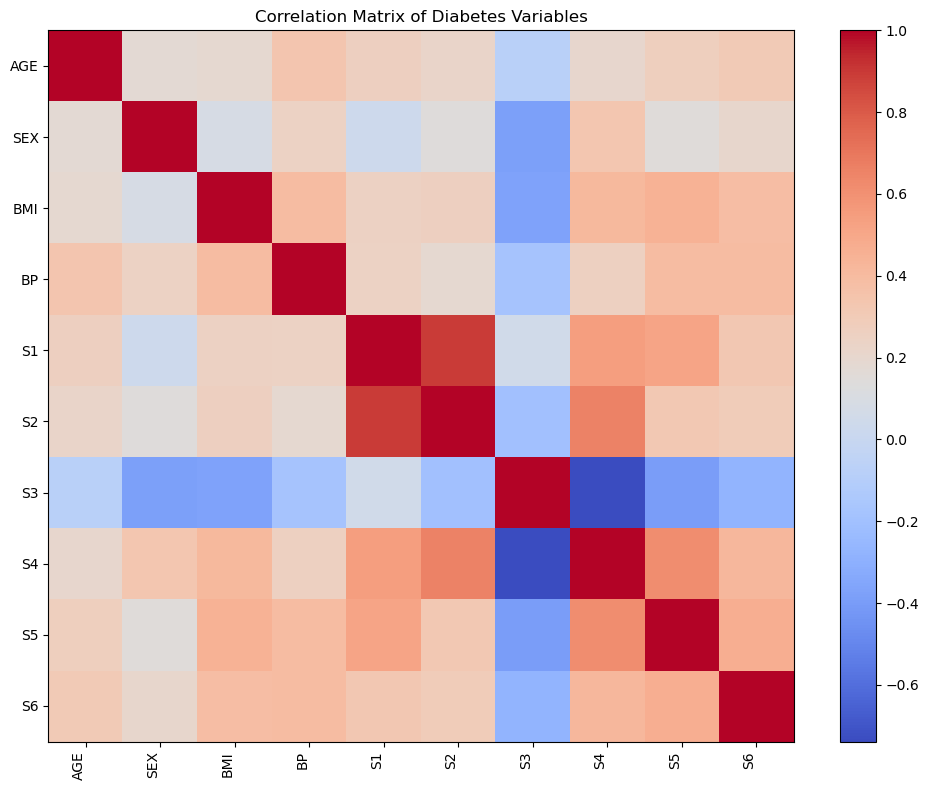

In [9]:
# Correlation matrix
corr_matrix = X.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()

plt.xticks(range(len(X.columns)), X.columns, rotation=90, ha='right')
plt.yticks(range(len(X.columns)), X.columns)

plt.title("Correlation Matrix of Diabetes Variables")
plt.tight_layout()
plt.show()

In [10]:
## 1.3 Multivariate Linear Regression

In [11]:
X_const = sm.add_constant(X)

# Fit OLS linear regression model
linear_model = sm.OLS(y, X_const).fit()

y_pred = linear_model.predict(X_const)

mse_full = mean_squared_error(y, y_pred)
adj_r2_full = linear_model.rsquared_adj

# Display results
print(f"Mean Squared Error (MSE): {mse_full:.4f}")
print(f"Adjusted R-squared:  {adj_r2_full:.4f}")

Mean Squared Error (MSE): 2859.6963
Adjusted R-squared:  0.5066


In [12]:
## 1.5 Forward Selection

In [13]:
remaining = list(X.columns)
selected = []
current_aic = float("inf")
best_model = None

while remaining:
    candidates = []
    for feature in remaining:
        features = selected + [feature]
        model = sm.OLS(y, sm.add_constant(X[features])).fit()
        candidates.append((model.aic, feature, model))
    
    best_aic, best_feature, model = min(candidates, key=lambda x: x[0])
    
    if best_aic < current_aic:
        selected.append(best_feature)
        remaining.remove(best_feature)
        current_aic = best_aic
        best_model = model
    else:
        break

# Final metrics
y_pred = best_model.predict(sm.add_constant(X[selected]))
mse = mean_squared_error(y, y_pred)

print("Selected Variables:", selected)
print(f"MSE:{mse:.4f}")
print(f"R²:{best_model.rsquared:.4f}")

Selected Variables: ['BMI', 'S5', 'BP', 'S1', 'SEX', 'S2']
MSE:2876.6833
R²:0.5149


In [14]:
## 2.2 Loading the Titanic dataset 

In [15]:
from pathlib import Path
import pandas as pd

filepath = Path("titanic3.csv")

if not filepath.is_file():
    raise FileNotFoundError(f"Dataset not found: {filepath}")

df = pd.read_csv(filepath)

print(f"Dataset shape: {df.shape}  |  File: {filepath.name}")

if 'survived' not in df.columns:
    raise KeyError("'survived' column is missing")

df['survived'] = pd.to_numeric(df['survived'], errors='coerce').astype('Int64')

df.head()

prob_survival = df['survived'].mean()
print(f"Survival probability: {prob_survival:.4f}")

Dataset shape: (1309, 14)  |  File: titanic3.csv
Survival probability: 0.3820


In [16]:
## 2.3 Table of survival probabilities by class, gender, and age

In [17]:
# 1. Bin ages into meaningful categories
age_bins = [0, 12, 18, 35, 60, 100]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

df['age_group'] = pd.cut(
    df['age'],
    bins=age_bins,
    labels=age_labels,
    include_lowest=True,
    right=False
)

# 2. Compute survival rates by key groups
survival_table = (
    df.groupby(['pclass', 'sex', 'age_group'], observed=False)['survived']
    .agg(['mean', 'count'])           
    .rename(columns={'mean': 'survival_rate'})
    .reset_index()
)

# Format for better readability
survival_table['survival_rate'] = survival_table['survival_rate'].round(4)
survival_table = survival_table.sort_values(['pclass', 'sex', 'age_group'])

survival_table

,pclass,sex,age_group,survival_rate,count
0,1,female,Child,0.0,1
1,1,female,Teen,1.0,7
2,1,female,Young Adult,0.98,50
3,1,female,Adult,0.9697,66
4,1,female,Senior,0.8889,9
5,1,male,Child,1.0,4
6,1,male,Teen,0.6667,3
7,1,male,Young Adult,0.381,42
8,1,male,Adult,0.3412,85
9,1,male,Senior,0.1176,17


In [18]:
## 2.4 Logistic regression model (class, sex, age)

In [19]:
features = ['pclass', 'sex', 'age', 'survived']
model_df = df[features].dropna().copy()

model_df['sex'] = model_df['sex'].map({'female': 1, 'male': 0})

X = model_df[['pclass', 'sex', 'age']]
y = model_df['survived']

X = sm.add_constant(X, has_constant='add')

logit_model = sm.Logit(y, X)
result = logit_model.fit(disp=0)   

# Show results
print("Logistic Regression Model Summary\n" + "="*50)
print(result.summary())

Logistic Regression Model Summary
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                 1046
Model:                          Logit   Df Residuals:                     1042
Method:                           MLE   Df Model:                            3
Date:                Sun, 11 Jan 2026   Pseudo R-squ.:                  0.3051
Time:                        21:19:53   Log-Likelihood:                -491.51
converged:                       True   LL-Null:                       -707.31
Covariance Type:            nonrobust   LLR p-value:                 3.167e-93
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0919      0.371      5.633      0.000       1.364       2.820
pclass        -1.1332      0.112    -10.142      0.000      -1.352      -0.914
sex            2.4

In [20]:
## 2.5 Model performance using confusion matrix

In [21]:
# Prepare data
features = ['pclass', 'sex', 'age']
X = model_df[features]
y = model_df['survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Train model
clf = LogisticRegression(solver='lbfgs', max_iter=1000)
clf.fit(X_train, y_train)

# Predict & evaluate
y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Results
print("Confusion Matrix (Test Set):")
print("Predicted")
print("Negative  Positive")
print("Actual Negative |", conf_matrix[0,0], "   ", conf_matrix[0,1])
print("Actual Positive |", conf_matrix[1,0], "   ", conf_matrix[1,1])
print(f"\nAccuracy: {accuracy:.4f} ({accuracy:.1%})")

Confusion Matrix (Test Set):
Predicted
Negative  Positive
Actual Negative | 155     31
Actual Positive | 26     102

Accuracy: 0.8185 (81.8%)


In [22]:
## 3.3  stock data

In [23]:
import yfinance as yf

stocks = [
    'UNH', 'GS', 'HD', 'AMGN', 'MCD', 'MSFT', 'CAT', 'HON', 'V', 'TRV',
    'CVX', 'JNJ', 'BA', 'AXP', 'WMT', 'IBM', 'PG', 'AAPL', 'CRM', 'JPM',
    'MMM', 'NKE', 'MRK', 'DIS', 'KO', 'DOW', 'CSCO', 'AMZN', 'VZ', 'INTC'
]

# Download 2020 adjusted close prices
data = yf.download(stocks, start='2020-01-01', end='2021-01-01', auto_adjust=True)

prices = data['Close']

# Optional preview
prices.head()

[*********************100%***********************]  30 of 30 completed


Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,72.468292,199.607437,94.900497,116.380058,331.348572,132.874908,164.985397,40.472336,92.917870,144.790268,...,120.682518,72.627342,152.505692,94.273293,106.273262,121.050346,265.243042,183.186218,43.349491,36.433830
2020-01-03,71.763718,198.252365,93.748497,115.224106,330.791901,131.030060,164.175232,39.812008,92.596512,143.129379,...,119.643311,72.003983,150.606689,94.014999,105.558495,120.619003,262.558899,181.729309,42.887951,36.112190
2020-01-06,72.335564,199.773682,95.143997,114.724731,331.766083,130.941803,171.367828,39.954105,92.282761,142.298935,...,119.757301,72.311722,150.996033,93.931984,105.704887,120.751068,264.381561,181.336349,42.795635,36.038681
2020-01-07,71.995354,197.894836,95.343002,114.123657,335.285156,129.211670,173.887222,39.694992,91.104355,142.347778,...,119.274544,70.386360,149.619293,93.885849,105.050430,118.981667,262.785614,180.857101,42.319889,35.704781
2020-01-08,73.153511,198.044479,94.598503,116.093376,329.410095,130.359177,175.201233,39.720070,90.063683,142.054688,...,121.104897,69.912918,152.002502,93.673706,105.498215,120.258072,268.326111,183.953049,42.397999,35.582268


In [24]:
##  correlation matrix

In [25]:
returns = prices.pct_change().dropna()
corr_matrix = returns.corr()

# Preview
corr_matrix.round(3).style.background_gradient(cmap='coolwarm', axis=None)

Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,GS,HD,HON,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WMT
Ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.616000,0.697000,0.516000,0.462000,0.502000,0.624000,0.661000,0.494000,0.522000,0.487000,0.619000,0.700000,0.568000,0.576000,0.634000,0.607000,0.535000,0.559000,0.610000,0.530000,0.578000,0.839000,0.608000,0.639000,0.479000,0.649000,0.708000,0.555000,0.536000
AMGN,0.616000,1.000000,0.528000,0.438000,0.281000,0.520000,0.493000,0.643000,0.457000,0.415000,0.477000,0.519000,0.619000,0.502000,0.567000,0.604000,0.719000,0.495000,0.540000,0.469000,0.545000,0.685000,0.695000,0.447000,0.697000,0.469000,0.663000,0.613000,0.606000,0.586000
AMZN,0.697000,0.528000,1.000000,0.228000,0.225000,0.273000,0.599000,0.495000,0.222000,0.369000,0.307000,0.376000,0.491000,0.251000,0.413000,0.511000,0.413000,0.262000,0.312000,0.381000,0.287000,0.415000,0.739000,0.380000,0.483000,0.279000,0.454000,0.447000,0.398000,0.447000
AXP,0.516000,0.438000,0.228000,1.000000,0.745000,0.720000,0.419000,0.623000,0.803000,0.764000,0.697000,0.851000,0.628000,0.861000,0.713000,0.558000,0.547000,0.892000,0.711000,0.715000,0.679000,0.500000,0.552000,0.662000,0.463000,0.714000,0.651000,0.825000,0.532000,0.257000
BA,0.462000,0.281000,0.225000,0.745000,1.000000,0.590000,0.367000,0.492000,0.687000,0.636000,0.601000,0.678000,0.585000,0.735000,0.637000,0.469000,0.415000,0.709000,0.645000,0.607000,0.522000,0.396000,0.455000,0.603000,0.365000,0.619000,0.523000,0.646000,0.427000,0.165000
CAT,0.502000,0.520000,0.273000,0.720000,0.590000,1.000000,0.389000,0.669000,0.694000,0.668000,0.808000,0.731000,0.585000,0.788000,0.751000,0.514000,0.631000,0.756000,0.719000,0.601000,0.783000,0.557000,0.537000,0.634000,0.557000,0.623000,0.580000,0.712000,0.640000,0.359000
CRM,0.624000,0.493000,0.599000,0.419000,0.367000,0.389000,1.000000,0.519000,0.409000,0.449000,0.452000,0.490000,0.628000,0.408000,0.489000,0.498000,0.440000,0.432000,0.436000,0.567000,0.397000,0.490000,0.729000,0.491000,0.435000,0.445000,0.481000,0.616000,0.404000,0.392000
CSCO,0.661000,0.643000,0.495000,0.623000,0.492000,0.669000,0.519000,1.000000,0.582000,0.641000,0.593000,0.660000,0.683000,0.652000,0.746000,0.679000,0.700000,0.620000,0.607000,0.638000,0.697000,0.611000,0.720000,0.590000,0.672000,0.519000,0.620000,0.732000,0.661000,0.522000
CVX,0.494000,0.457000,0.222000,0.803000,0.687000,0.694000,0.409000,0.582000,1.000000,0.672000,0.645000,0.766000,0.655000,0.800000,0.700000,0.542000,0.562000,0.805000,0.664000,0.714000,0.639000,0.579000,0.546000,0.610000,0.434000,0.712000,0.658000,0.771000,0.507000,0.238000


## PCA

In [27]:
# Standardize the correlation matrix
scaler = StandardScaler()
scaled_corr = scaler.fit_transform(corr_matrix)

# Perform PCA
pca = PCA()
pca.fit(scaled_corr)

# Display key PCA results
n_components = len(pca.explained_variance_ratio_)
print(f"Number of components: {n_components}")
print("\nExplained variance ratio per component:")
for i, ratio in enumerate(pca.explained_variance_ratio_, 1):
    print(f"PC{i}: {ratio:.4f} ({ratio*100:.1f}%)")

print(f"\nCumulative explained variance:")
print(np.cumsum(pca.explained_variance_ratio_).round(4))

Number of components: 30

Explained variance ratio per component:
PC1: 0.4665 (46.6%)
PC2: 0.1909 (19.1%)
PC3: 0.1214 (12.1%)
PC4: 0.0433 (4.3%)
PC5: 0.0351 (3.5%)
PC6: 0.0247 (2.5%)
PC7: 0.0193 (1.9%)
PC8: 0.0172 (1.7%)
PC9: 0.0137 (1.4%)
PC10: 0.0117 (1.2%)
PC11: 0.0083 (0.8%)
PC12: 0.0079 (0.8%)
PC13: 0.0059 (0.6%)
PC14: 0.0052 (0.5%)
PC15: 0.0046 (0.5%)
PC16: 0.0044 (0.4%)
PC17: 0.0037 (0.4%)
PC18: 0.0032 (0.3%)
PC19: 0.0027 (0.3%)
PC20: 0.0022 (0.2%)
PC21: 0.0016 (0.2%)
PC22: 0.0015 (0.1%)
PC23: 0.0013 (0.1%)
PC24: 0.0012 (0.1%)
PC25: 0.0009 (0.1%)
PC26: 0.0006 (0.1%)
PC27: 0.0004 (0.0%)
PC28: 0.0003 (0.0%)
PC29: 0.0002 (0.0%)
PC30: 0.0000 (0.0%)

Cumulative explained variance:
[0.4665 0.6574 0.7788 0.8221 0.8572 0.8819 0.9012 0.9185 0.9321 0.9439
 0.9522 0.9601 0.966  0.9713 0.9758 0.9802 0.9839 0.9871 0.9898 0.9919
 0.9936 0.9951 0.9964 0.9976 0.9985 0.9991 0.9995 0.9998 1.     1.    ]


In [28]:
## PCA weights (PC1 & PC2)

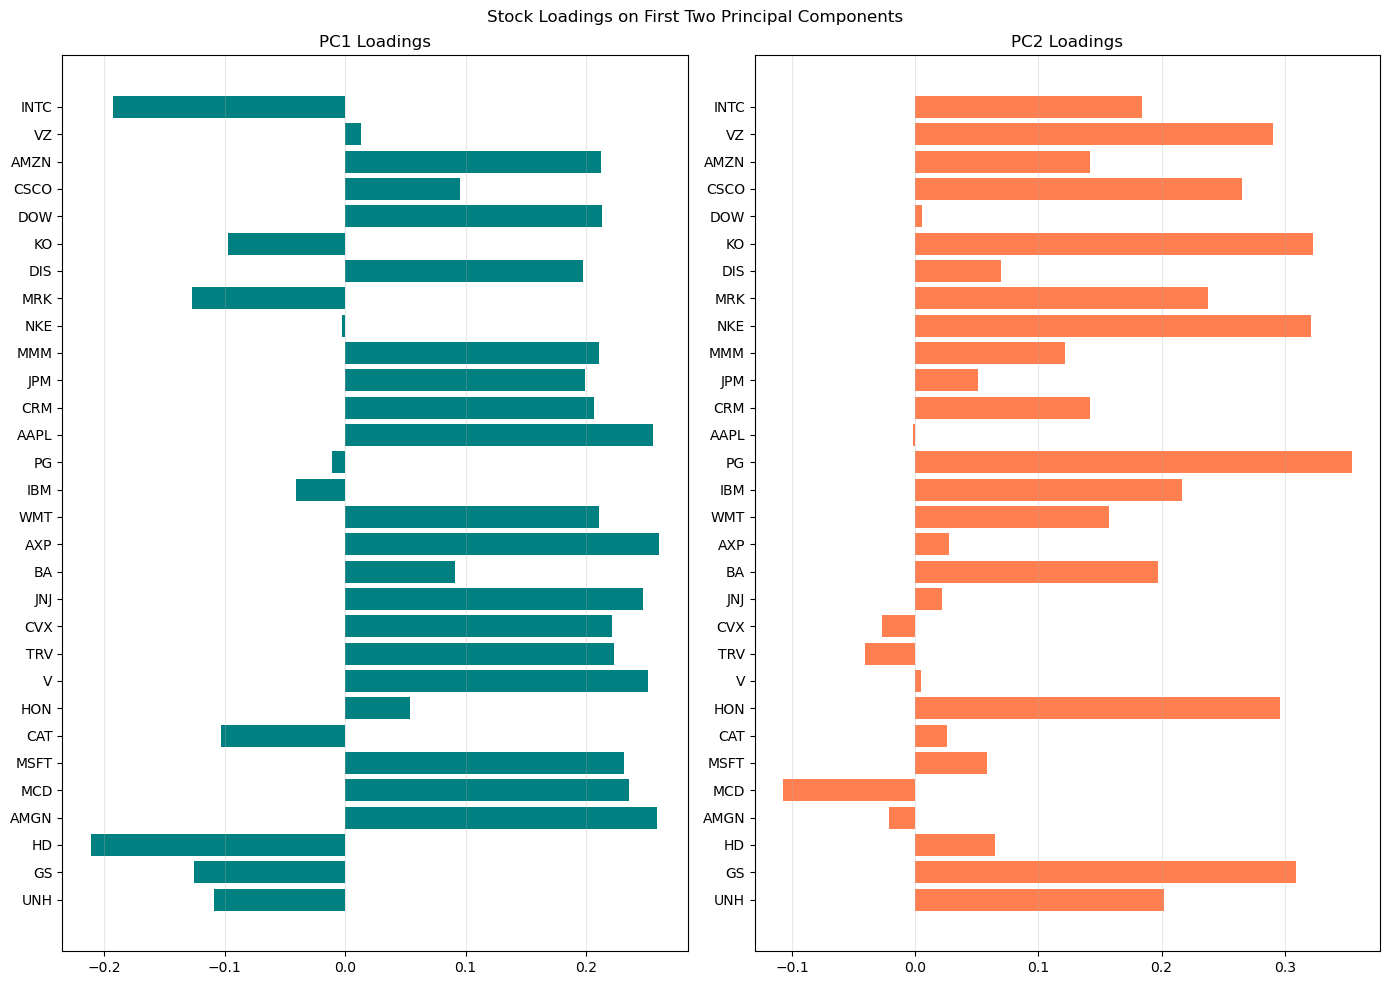

In [30]:
# Extract loadings for first two principal components
pc1_weights = pca.components_[0]
pc2_weights = pca.components_[1]

# Now the horizontal bar plots will work
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 10))

ax1.barh(stocks, pc1_weights, color='teal')
ax1.set_title("PC1 Loadings")
ax1.grid(axis='x', alpha=0.3)

ax2.barh(stocks, pc2_weights, color='coral')
ax2.set_title("PC2 Loadings")
ax2.grid(axis='x', alpha=0.3)

plt.suptitle("Stock Loadings on First Two Principal Components")
plt.tight_layout()
plt.show()

In [31]:
## Scree plot

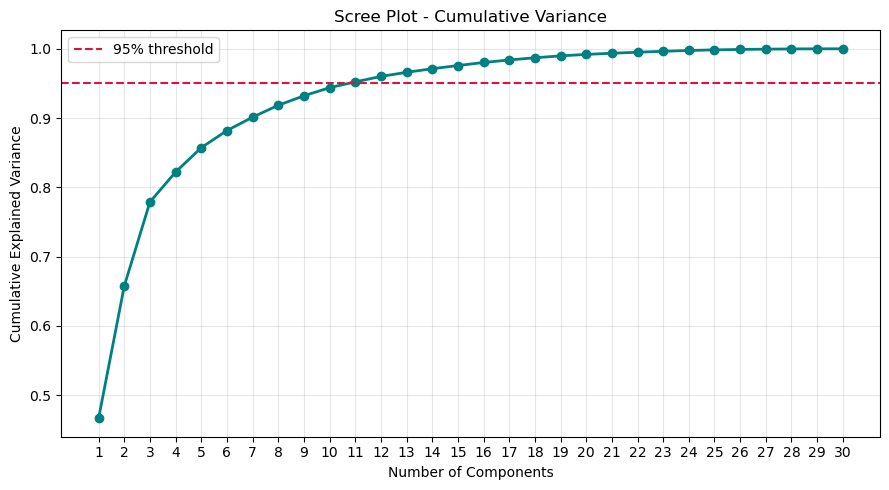

In [32]:
cum_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(9, 5))
plt.plot(range(1, len(cum_var) + 1), cum_var, 'o-', color='teal', linewidth=2)
plt.axhline(0.95, color='crimson', linestyle='--', label='95% threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot - Cumulative Variance')
plt.grid(alpha=0.3)
plt.legend()
plt.xticks(range(1, len(cum_var) + 1))
plt.tight_layout()
plt.show()

In [33]:
## PCA scatter plot and outlier detection

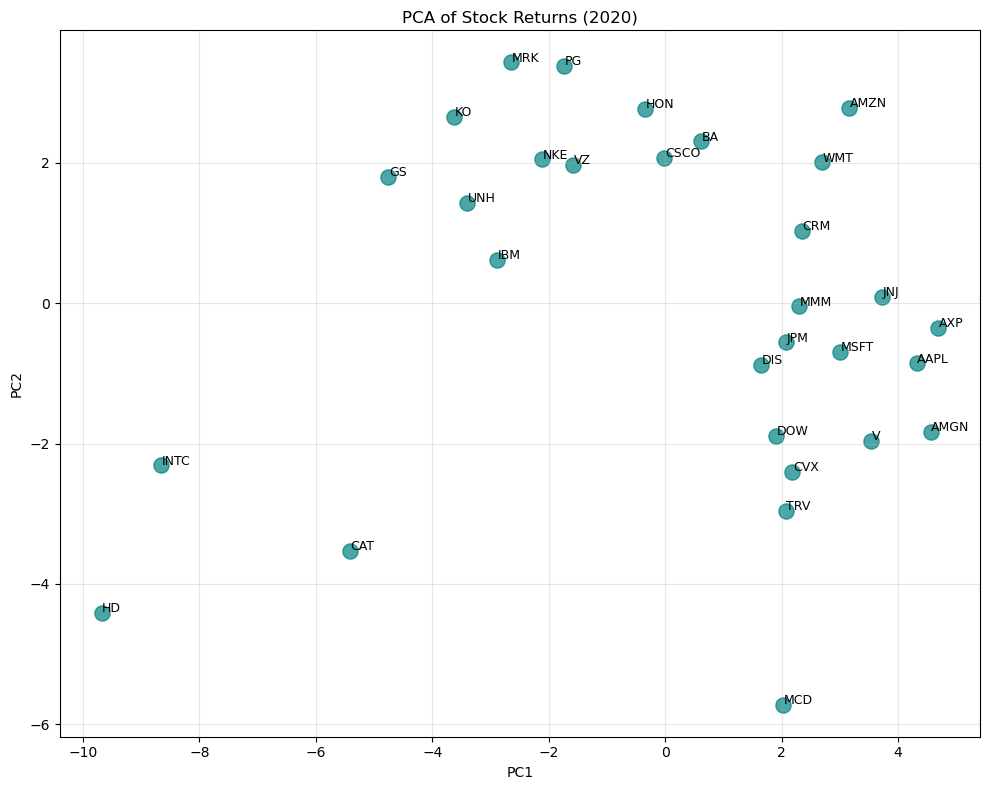

Top 3 outliers: ['HD', 'INTC', 'CAT']
Indices: [2, 29, 6]


[[2, 29, 6], ['HD', 'INTC', 'CAT']]

In [34]:
# Project into PCA space
pca_scores = pca.transform(scaled_corr)

# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], c='teal', s=120, alpha=0.7)
for i, txt in enumerate(stocks):
    plt.annotate(txt, (pca_scores[i, 0] + 0.01, pca_scores[i, 1] + 0.01), fontsize=9)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Stock Returns (2020)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Euclidean distances from mean
mean_pc = pca_scores.mean(axis=0)
distances = np.linalg.norm(pca_scores - mean_pc, axis=1)

# Top 3 outliers
top3_idx = np.argsort(distances)[-3:][::-1]
top3_stocks = [stocks[i] for i in top3_idx]

print("Top 3 outliers:", top3_stocks)
print("Indices:", top3_idx.tolist())

[top3_idx.tolist(), top3_stocks]